In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.callbacks import ReduceLROnPlateau

import cv2 
import os
for root, dirs, files in os.walk(".", topdown=False):
   for name in files:
      print(os.path.join(root, name))
   for name in dirs:
      print(os.path.join(root, name))

.\.ipynb_checkpoints\CNN_Pneumonia(ML)-checkpoint.ipynb
.\.ipynb_checkpoints\Pneumonia_Restnet(ML)-checkpoint.ipynb
.\.ipynb_checkpoints\Pneumonia_VGG19(ML)-checkpoint.ipynb
.\hadoop-3.3.1\bin\container-executor
.\hadoop-3.3.1\bin\hadoop
.\hadoop-3.3.1\bin\hadoop.cmd
.\hadoop-3.3.1\bin\hdfs
.\hadoop-3.3.1\bin\hdfs.cmd
.\hadoop-3.3.1\bin\mapred
.\hadoop-3.3.1\bin\mapred.cmd
.\hadoop-3.3.1\bin\oom-listener
.\hadoop-3.3.1\bin\test-container-executor
.\hadoop-3.3.1\bin\yarn
.\hadoop-3.3.1\bin\yarn.cmd
.\hadoop-3.3.1\etc\hadoop\shellprofile.d\example.sh
.\hadoop-3.3.1\etc\hadoop\capacity-scheduler.xml
.\hadoop-3.3.1\etc\hadoop\configuration.xsl
.\hadoop-3.3.1\etc\hadoop\container-executor.cfg
.\hadoop-3.3.1\etc\hadoop\core-site.xml
.\hadoop-3.3.1\etc\hadoop\hadoop-env.cmd
.\hadoop-3.3.1\etc\hadoop\hadoop-env.sh
.\hadoop-3.3.1\etc\hadoop\hadoop-metrics2.properties
.\hadoop-3.3.1\etc\hadoop\hadoop-policy.xml
.\hadoop-3.3.1\etc\hadoop\hadoop-user-functions.sh.example
.\hadoop-3.3.1\etc\hadoop\

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Resizing all images to 256x256

In [2]:
labels = ['no_pneumonia', 'pneumonia']
img_size = 256
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img) , cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

# Loading of dataset

In [3]:
test = get_training_data('C:/Users/Computing/Desktop/lukman/test')
train = get_training_data('C:/Users/Computing/Desktop/lukman/train')
val = get_training_data('C:/Users/Computing/Desktop/lukman/val')


<ipython-input-2-dd63476c6ed9>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


# Plotting the number of training observations for each class

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

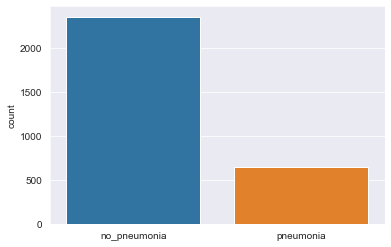

In [4]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("no_pneumonia")
    else:
        l.append("pneumonia")
sns.set_style('darkgrid')
sns.countplot(l)

# 1 image for each class

Text(0.5, 1.0, 'pneumonia')

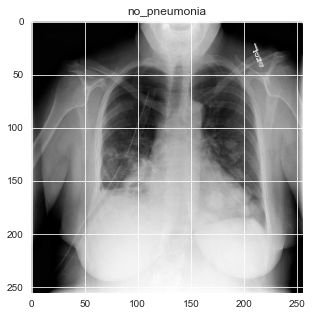

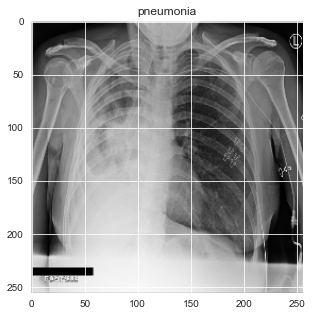

In [5]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

# labels and images for each test/train and validation set

In [6]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

# Performing a grayscale normalization so that CNN converges faster on [0 to 1] data than on [0 to 255].

In [7]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

# Reshape  for deep learning

In [8]:
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

# Creation of  CNN model

In [9]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (256,256,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.05))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.01))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.01))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 dropout (Dropout)           (None, 128, 128, 64)      0         
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 64)     2

# Training the model

In [10]:
#fit model
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.00001)
history = model.fit(x_train,y_train, batch_size = 32 ,epochs = 20 , validation_data = (x_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/20
94/94 [==============================] - 367s 4s/step - loss: 0.9537 - accuracy: 0.7583 - val_loss: 0.5379 - val_accuracy: 0.7800 - lr: 0.0010
Epoch 2/20
94/94 [==============================] - 336s 4s/step - loss: 0.5279 - accuracy: 0.7810 - val_loss: 0.5668 - val_accuracy: 0.7260 - lr: 0.0010
Epoch 3/20
94/94 [==============================] - 333s 4s/step - loss: 0.4682 - accuracy: 0.7843 - val_loss: 0.7530 - val_accuracy: 0.7820 - lr: 0.0010
Epoch 4/20
94/94 [==============================] - 333s 4s/step - loss: 0.4474 - accuracy: 0.8033 - val_loss: 0.6536 - val_accuracy: 0.5860 - lr: 0.0010
Epoch 5/20
94/94 [==============================] - ETA: 0s - loss: 0.4316 - accuracy: 0.8143
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
94/94 [==============================] - 323s 3s/step - loss: 0.4316 - accuracy: 0.8143 - val_loss: 0.5245 - val_accuracy: 0.7740 - lr: 0.0010
Epoch 6/20
94/94 [==============================] - 333s 4s/step - loss

# Display of test accuracy

In [11]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

16/16 [==============================] - 6s 400ms/step - loss: 0.4423 - accuracy: 0.8080
Loss of the model is -  0.442263662815094
16/16 [==============================] - 6s 403ms/step - loss: 0.4423 - accuracy: 0.8080
Accuracy of the model is -  80.80000281333923 %


# Display training and validation accuracy vs loss

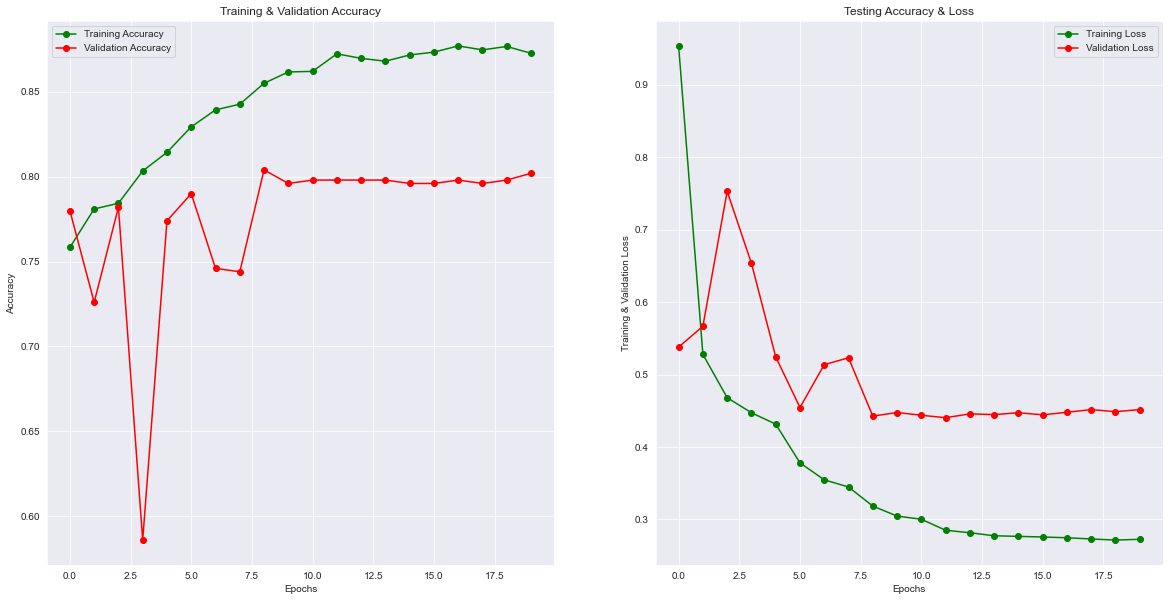

In [12]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()


# Predict outputs labels for test dataset and display first 15 predictions

In [17]:
predictions = (model.predict(x_test) > 0.5).astype("int32")
predictions[:15]

16/16 [==============================] - 7s 402ms/step


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [20]:
val_datagen = ImageDataGenerator(rescale=1. / 255)
valid_dir = 'C:/Users/Computing/Desktop/lukman/val'
validation_generator = val_datagen.flow_from_directory(valid_dir,
                                                       target_size=(224, 224),
                                                       batch_size=32,
                                                       class_mode='categorical')

y_pred = np.argmax(predictions, axis=1)
cm = confusion_matrix(validation_generator.classes,y_pred)
cm

print('='*50)                                
print('True Positive  (TP) = ', cm[0][0])
print('False Positive (FP) = ', cm[0][1])
print('False Negative (FN) = ', cm[1][0])
print('True Negative  (TN) = ', cm[1][1])
#cm = confusion_matrix(y_test,predictions)
#cm

Found 500 images belonging to 2 classes.
True Positive  (TP) =  390
False Positive (FP) =  0
False Negative (FN) =  110
True Negative  (TN) =  0


#  classification report in a tabular form

In [21]:
print(classification_report(y_test, predictions, target_names = ['No_Pneumonia (Class 0)','Pneumonia (Class 1)']))

                        precision    recall  f1-score   support

No_Pneumonia (Class 0)       0.85      0.93      0.88       395
   Pneumonia (Class 1)       0.57      0.36      0.44       105

              accuracy                           0.81       500
             macro avg       0.71      0.64      0.66       500
          weighted avg       0.79      0.81      0.79       500



# confusion matrix 

In [22]:
cm = confusion_matrix(y_test,predictions)
cm

array([[366,  29],
       [ 67,  38]], dtype=int64)

# Plotting of confusion matrix

<AxesSubplot:>

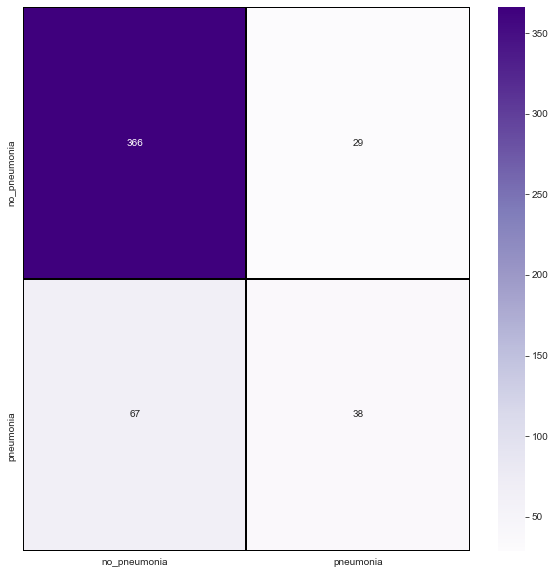

In [29]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Purples", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

# Seperation of  Correct and incorrect predictions

In [28]:
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

# Visualization of 5 correctly predicted classes


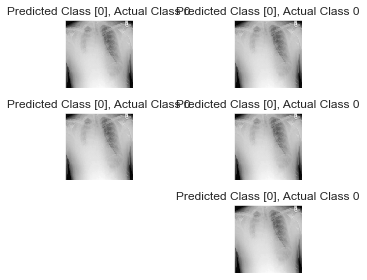

In [26]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(256,256), cmap="gray", interpolation='none')
    plt.title ("Predicted Class {}, Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

# Visualization of 5 incorrect predicted classes


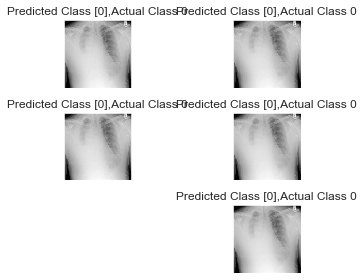

In [27]:
i = 0
for c in incorrect[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(256,256), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1